In [1]:
import numpy as np
import pandas as pd

In [2]:
med_df = pd.read_csv('insurance.csv')
med_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
med_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
med_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
med_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

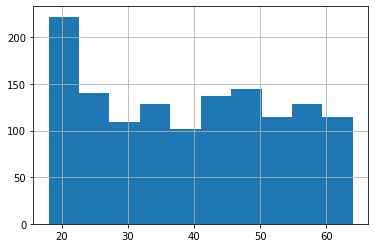

In [6]:
med_df.age.hist()

<AxesSubplot:>

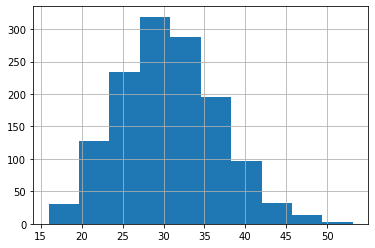

In [7]:
med_df.bmi.hist()

<AxesSubplot:>

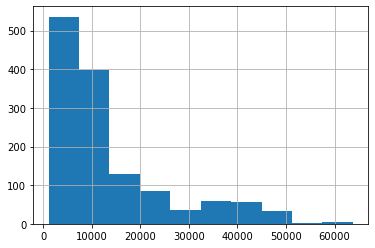

In [8]:
med_df.charges.hist()

<AxesSubplot:>

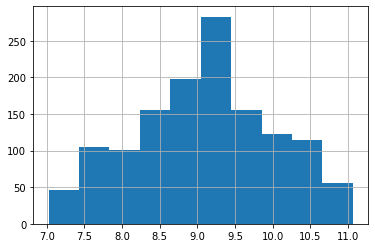

In [9]:
#log transform of Y variable
np.log1p(med_df['charges']).hist()

<AxesSubplot:>

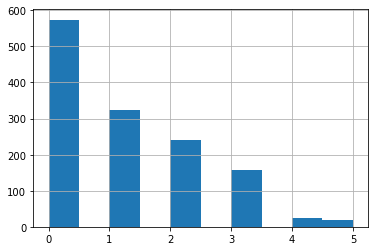

In [10]:
med_df.children.hist()

In [11]:
med_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [12]:
med_df.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [13]:
med_df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

Text(0.5, 0, 'charges')

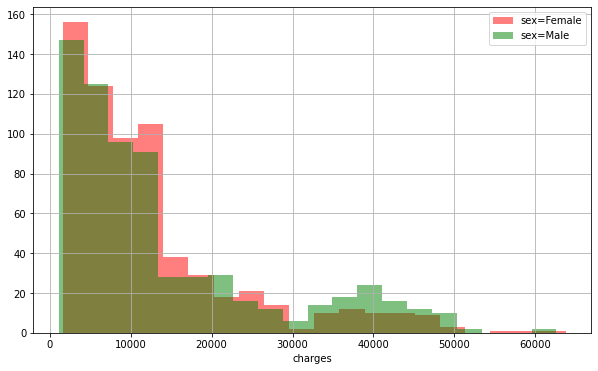

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
med_df[med_df['sex']=='female']['charges'].hist(alpha=0.5,color='red',
                                              bins=20,label='sex=Female')
med_df[med_df['sex']=='male']['charges'].hist(alpha=0.5,color='green',
                                              bins=20,label='sex=Male')
plt.legend()
plt.xlabel('charges')


Text(0.5, 0, 'charges')

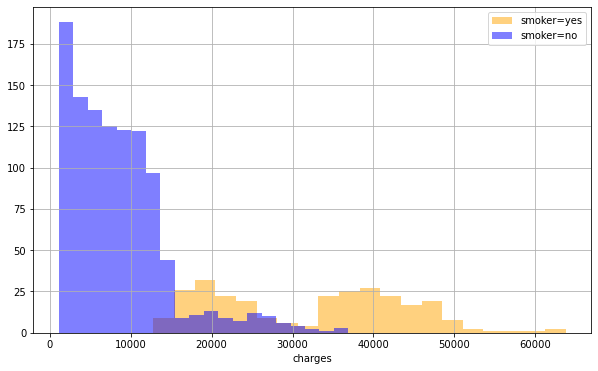

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
med_df[med_df['smoker']=='yes']['charges'].hist(alpha=0.5,color='orange',
                                              bins=20,label='smoker=yes')
med_df[med_df['smoker']=='no']['charges'].hist(alpha=0.5,color='blue',
                                              bins=20,label='smoker=no')
plt.legend()
plt.xlabel('charges')

Text(0.5, 0, 'charges')

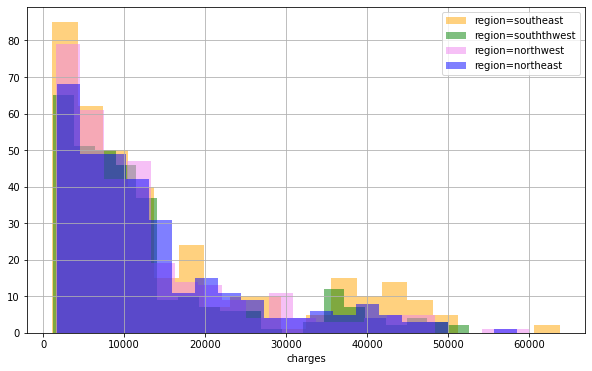

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
med_df[med_df['region']=='southeast']['charges'].hist(alpha=0.5,color='orange',bins=20,label='region=southeast')
med_df[med_df['region']=='southwest']['charges'].hist(alpha=0.5,color='green',bins=20,label='region=souththwest')
med_df[med_df['region']=='northwest']['charges'].hist(alpha=0.5,color='violet',bins=20,label='region=northwest')
med_df[med_df['region']=='northeast']['charges'].hist(alpha=0.5,color='blue',bins=20,label='region=northeast')                                              
plt.legend()
plt.xlabel('charges')

<AxesSubplot:>

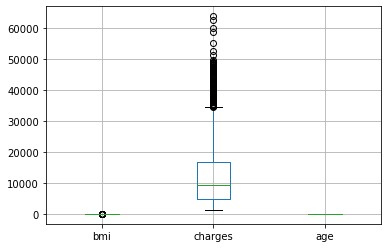

In [17]:
med_df.boxplot(column=['bmi','charges','age'])

In [18]:
med_df[['charges','sex']].groupby(by = 'sex').describe()

charges                                                                \
         count          mean           std        min        25%         50%   
sex                                                                            
female   662.0  12569.578844  11128.703801  1607.5101  4885.1587  9412.96250   
male     676.0  13956.751178  12971.025915  1121.8739  4619.1340  9369.61575   

                                   
                 75%          max  
sex                                
female  14454.691825  63770.42801  
male    18989.590250  62592.87309

**Observations**
- Females slightly higher in insurance charges 

In [19]:
med_df[['charges','region']].groupby(by = 'region').describe()

charges                                                      \
            count          mean           std        min          25%   
region                                                                  
northeast   324.0  13406.384516  11255.803066  1694.7964  5194.322288   
northwest   325.0  12417.575374  11072.276928  1621.3402  4719.736550   
southeast   364.0  14735.411438  13971.098589  1121.8739  4440.886200   
southwest   325.0  12346.937377  11557.179101  1241.5650  4751.070000   

                                                  
                    50%         75%          max  
region                                            
northeast  10057.652025  16687.3641  58571.07448  
northwest   8965.795750  14711.7438  60021.39897  
southeast   9294.131950  19526.2869  63770.42801  
southwest   8798.593000  13462.5200  52590.82939

**observations**
- charges are higher in northeast both mean and median


In [20]:
med_df[['charges','smoker']].groupby(by = 'smoker').describe()

charges                                                        \
         count          mean           std         min           25%   
smoker                                                                 
no      1064.0   8434.268298   5993.781819   1121.8739   3986.438700   
yes      274.0  32050.231832  11541.547176  12829.4551  20826.244213   

                                                
                50%           75%          max  
smoker                                          
no       7345.40530  11362.887050  36910.60803  
yes     34456.34845  41019.207275  63770.42801

**Observation**
- smoker and non-smoker has a big difference in Insurance charges **roughly , 4 times** the non smoker 

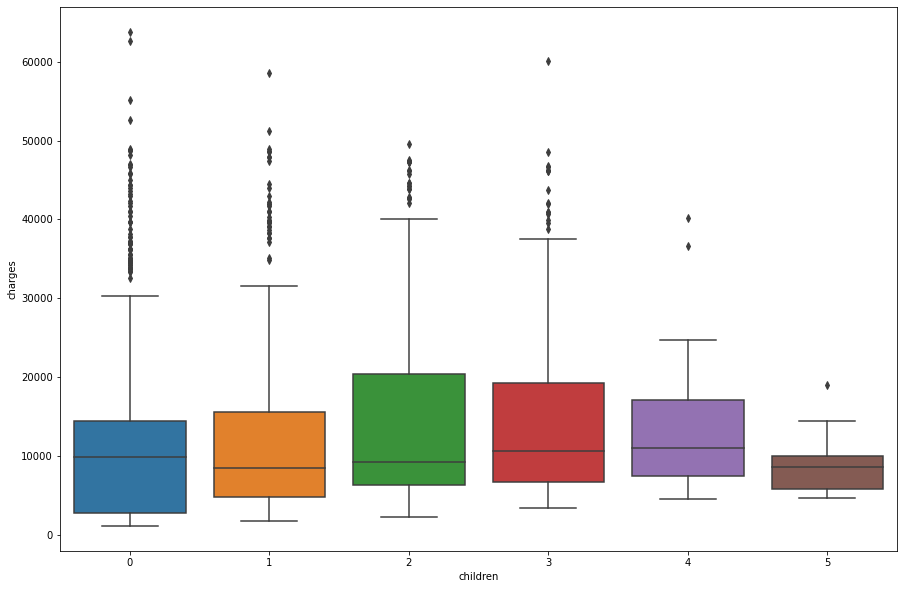

In [21]:
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=(15,10)
sns.boxplot(x = 'children', y = 'charges', data =med_df )

plt.show()

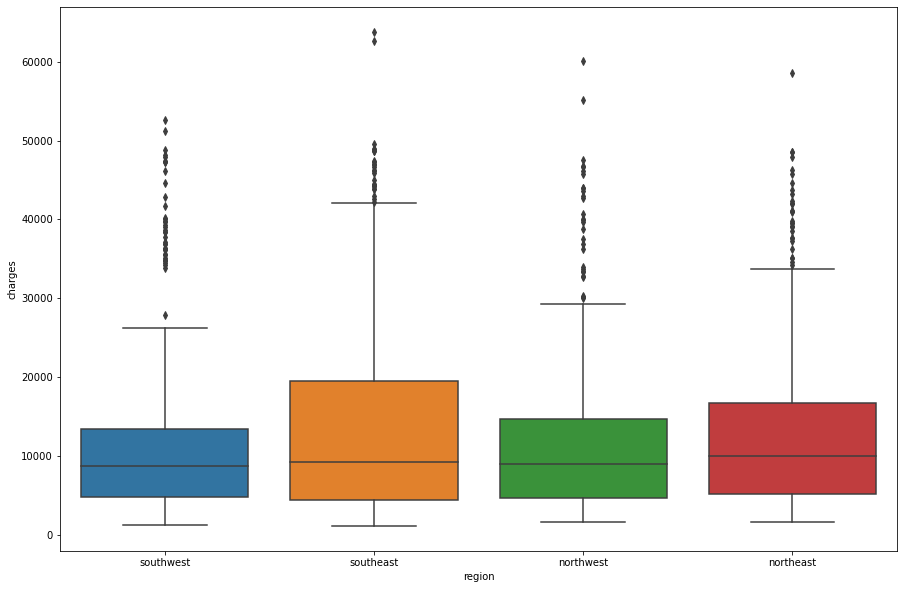

In [22]:
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=(15,10)
sns.boxplot(x = 'region', y = 'charges', data =med_df )

plt.show()

In [23]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
med_df = pd.get_dummies(med_df, columns= ['region','sex','smoker'], drop_first=True)

med_df.head()

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


Text(0.5, 1.0, 'Correlation between features')

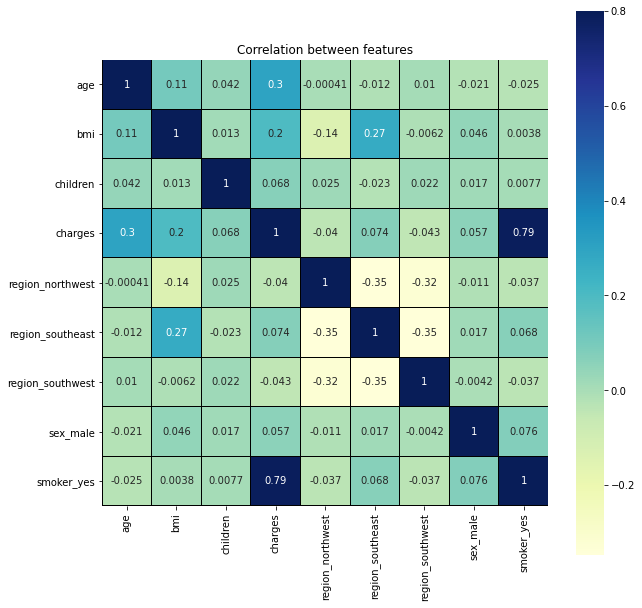

In [24]:
#feature selection
#Sal['phd']=np.cbrt(Sal['phd'])
#Sal['salary']=np.cbrt(Sal['salary'])
corr = med_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [25]:
X = pd.DataFrame()
def lr():
    X=med_df.drop(['charges','children'], axis=1)# write your code to create a dataframe of dependent variables excluding 'y' variable
    return X
X = lr()
 
print(X.head())


   age     bmi  region_northwest  region_southeast  region_southwest  \
0   19  27.900                 0                 0                 1   
1   18  33.770                 0                 1                 0   
2   28  33.000                 0                 1                 0   
3   33  22.705                 1                 0                 0   
4   32  28.880                 1                 0                 0   

   sex_male  smoker_yes  
0         0           1  
1         1           0  
2         1           0  
3         1           0  
4         1           0  


In [26]:
y = pd.DataFrame()

def lr():
    y = med_df['charges'] # write your code to create a dataframe which consists only of dependepent variable
    return y
y = lr()


In [27]:
from sklearn.model_selection import train_test_split 
def lr():
    return train_test_split(X, y, test_size=0.15, random_state=0)  # train test split using train_test_split of 75:25 and random state=1
X_train, X_test, y_train, y_test = lr()

In [28]:
X_train.head()

,age,bmi,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
420,64,33.880,0,1,0,1,1
27,55,32.775,1,0,0,0,0
982,31,25.900,0,0,1,1,1
1005,29,31.730,1,0,0,1,0
615,47,36.630,0,1,0,0,1


In [29]:

from sklearn.preprocessing import StandardScaler #mean = 0 and SD = 1 
sc = StandardScaler()
sc.fit(X_train)                                                                                   # fit the data to Standardscaler

X_test = sc.transform(X_test) 
X_train = sc.transform(X_train)    # transform the data

print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
X_train = pd.DataFrame(X_train)
X_train.columns = ['age','bmi','region_northwest','region_southeast','region_southwest','sex_male','smoker_yes']
X_test = pd.DataFrame(X_test)
X_test.columns = ['age','bmi','region_northwest','region_southeast','region_southwest','sex_male','smoker_yes']
X_train.head()
X_test.head()

After standardizing our features, the first 5 rows of our data now look like this:



,age,bmi,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,0.916602,-0.079176,-0.552627,-0.614965,1.716950,1.018643,-0.502198
1,0.561492,-0.213987,-0.552627,1.626109,-0.582428,-0.981698,-0.502198
2,0.632514,1.604329,1.809540,-0.614965,-0.582428,1.018643,1.991247
3,1.555800,1.249437,1.809540,-0.614965,-0.582428,1.018643,-0.502198
4,0.845580,-2.052605,1.809540,-0.614965,-0.582428,-0.981698,-0.502198


In [30]:
from sklearn.linear_model import LinearRegression
# import a class - knowhow

linreg = LinearRegression()
# create an object - actual computation

linreg.fit(X_train,y_train) 
#training the model
#calculation of b0 and b1
# physical act of computing

y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test) 
#predict
y_pred_test

array([11199.08113821,  9519.84229433, 37820.19985726, 16665.06405845,
        7401.57807555,  4603.65432687,  2129.26100946, 13438.58342201,
        8087.49268326,  6599.82001559,  3804.28703143,  9836.41937179,
        8785.92161309,  4280.65460699, 28487.97415252,  9887.10594704,
       11780.42736987,  6221.60722105,  7792.06626303, 27849.55339701,
       33393.41944974, 13870.1445813 , 12308.28330844, 32766.38227994,
        4605.38210025,  9348.21763757,  1709.91068969,  8928.49786076,
        4241.05169549,  9985.2667648 ,  8097.46208065, 40228.90068693,
       16121.99488969, 14302.50592695, 25506.13387394,  5723.69710442,
       12179.48997358, 30868.74504247, 33196.09669805,  4035.27489145,
        4596.25194002,  4472.3517445 , 31291.20346015, 39183.79930303,
       28334.84431008,  4561.97255617,  9778.44972864,  7843.28487826,
        3753.0684162 , 10297.35668328,  6220.56116117,  2487.53500921,
       33207.41563791, 37839.85071342, 16456.23447853,  7701.7281795 ,
      

In [31]:
from sklearn import metrics

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 6092.623375257843
RMSE for test set is 5940.0913694534


In [32]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score,mean_squared_error
# create regressor object
regressor = RandomForestRegressor(n_estimators = 10000, random_state = 42, max_depth=110,
                       max_leaf_nodes=None, max_samples=None,
                       min_samples_leaf=5, min_samples_split=12,)

In [33]:
def Forest():
    return regressor.fit(X_train,y_train)# the fitted model on X_train and y_train
Forest()

RandomForestRegressor(max_depth=110, min_samples_leaf=5, min_samples_split=12,
                      n_estimators=10000, random_state=42)

In [34]:

y_train_pred=regressor.predict(X_train)

y_train_pred_df= pd.DataFrame(y_train_pred)
display(y_train_pred)


array([46166.56002076, 12870.8546891 , 19175.85570232, ...,
        6570.37909746,  3317.97900771,  6761.32686904])

In [35]:
y_test_pred = regressor.predict(X_test)

y_test_pred_df= pd.DataFrame(y_test_pred)
 

display(y_test_pred)

array([11279.83952313, 10370.03592406, 45117.71023734, 15143.7887839 ,
       11095.46354584,  7306.11661607,  2540.79115741, 12338.3782836 ,
        6739.38859707,  5112.1871142 ,  7064.99890609, 13397.63980007,
        9253.38651808,  7378.03729371, 20457.19955948, 11300.18860636,
       14406.277138  ,  6242.21166828,  6762.12452244, 34442.39567116,
       24462.82532053, 12400.91258205, 12939.53528717, 27388.10681234,
        4278.0844282 ,  6549.0700916 ,  6609.83055119,  7313.885373  ,
        4658.54334939, 10026.1886533 ,  7643.18550387, 49120.24144368,
       16791.22413623, 12782.21426661, 15754.60386962,  4743.00023949,
        8574.82146205, 38046.29373513, 40066.04949444,  4312.85237634,
        6958.84405962,  5173.71792073, 20370.36709929, 48545.78820631,
       37844.16870489,  3468.78632494, 11421.01937614,  6731.77089652,
        5715.94186046, 12918.23979853,  4993.96547476,  5017.62157087,
       28130.22178912, 46353.95982728, 12354.11830844,  7093.16452699,
      

In [36]:
from sklearn import metrics

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 3846.4130856434904
RMSE for test set is 4229.062791927935


In [37]:
r2_train = metrics.r2_score(y_train,y_train_pred)
r2_test = metrics.r2_score(y_test,y_test_pred)

print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.8964445586145289
R2 score for test set is 0.892680553823514
